In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from Boosting import AdaBoostClas

In [20]:
data = pd.read_csv("iris_data.csv")
data

,feature1,feature2,target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
...,...,...,...
145,6.7,3.0,1.0
146,6.3,2.5,1.0
147,6.5,3.0,1.0
148,6.2,3.4,1.0


In [21]:
X = data.drop("target", axis = 1).values
y = data["target"].values.astype("int32")
y=np.where(y==0 , -1 , 1)

In [22]:
model = AdaBoostClassifier()
model.fit(X,y)

AdaBoostClassifier()

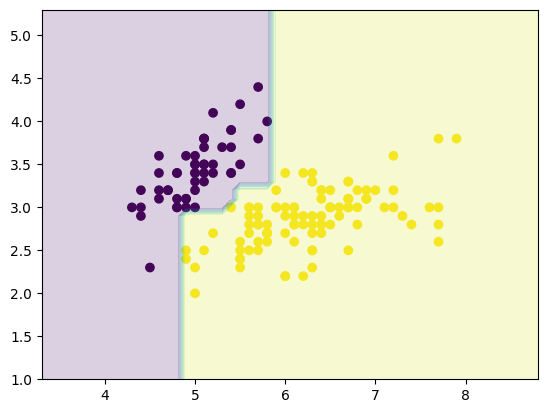

In [23]:
plt.scatter(X[:,0],X[:,1],c = y)
x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1, xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx2, z,alpha = .2)

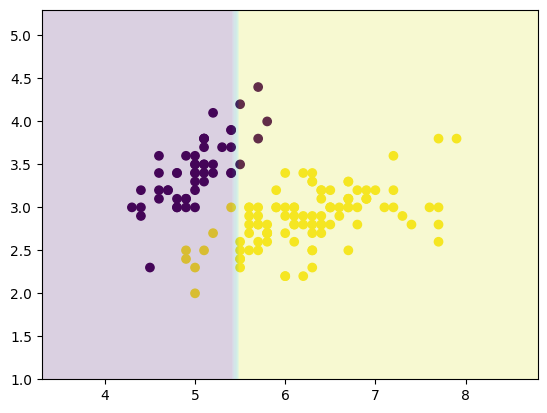

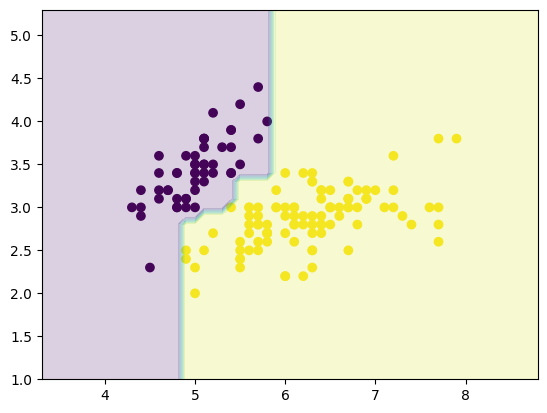

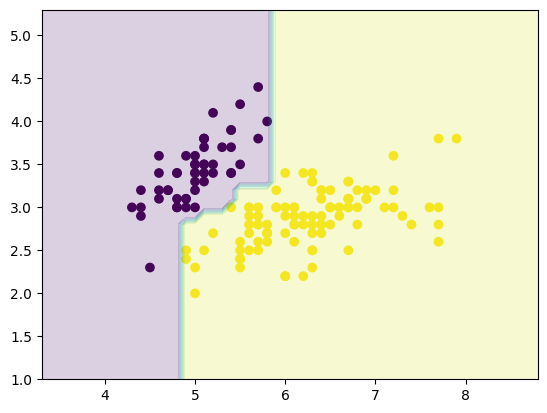

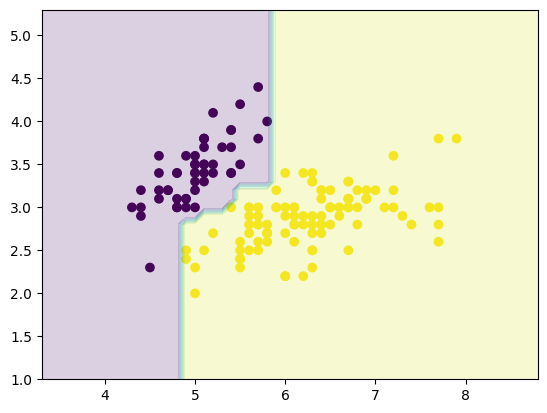

In [24]:
for i in range(1 , 100 ,30):
    model=AdaBoostClas(i)
    model.fit(X ,y)
    plt.scatter(X[:,0],X[:,1],c = y)
    x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min,x1_max,.1),
        np.arange(x2_min,x2_max,.1)
    )
    meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
    z = model.predict(meshgred_points)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z,alpha = .2)
    plt.show()